In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from scipy.stats import wilcoxon

In [6]:
fly_selected_list = ['nsyb-G7f-rAch1h/20230417-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230420-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230428-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230507-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-rAch1h/20230510-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly2/data_motion',
                     'nsyb-G7f-rAch1h/20230511-nsyb-G7f-rAch1h/fly3/data_motion',
                     'nsyb-G7f-rAch1h/20230515-nsyb-G7f-rAch1h/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230429-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230506-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly2/data_motion',
                     'nsyb-G7f-r5HT1.0/20230516-nsyb-G7f-r5HT1.0/fly4/data_motion',
                     'nsyb-G7f-r5HT1.0/20230517-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly1/data_motion',
                     'nsyb-G7f-r5HT1.0/20230601-nsyb-G7f-r5HT1.0/fly3/data_motion',
                     'nsyb-G7f-r5HT1.0/20230603-nsyb-G7f-r5HT1.0/fly1/data_motion']

In [7]:
file_save_path = 'motion_analysis'
motion_result_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new'
neural_result_path = '../results'
filename_1 = 'stim_classification_accuracy.npy'
filename_2 = 'odor_classification_accuracy.npy'
the_color = 'dimgrey'
if_save = False
the_save_path = os.path.join(neural_result_path,file_save_path,'4_motion_stim_classification')
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)

In [8]:
# load data
acc_list_1 = []
acc_list_2 = []
for i_fly in range(len(fly_selected_list)):
    fly_selected = fly_selected_list[i_fly]
    data_1 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_1))
    data_2 = np.load(os.path.join(motion_result_path,fly_selected,file_save_path,filename_2))
    acc_list_1.append(np.squeeze(data_1[:,49]))
    acc_list_2.append(np.squeeze(data_2[:,49]))
acc_list_1 = np.array(acc_list_1)
print(np.shape(acc_list_1))
acc_list_2 = np.array(acc_list_2)
print(np.shape(acc_list_2))

(20, 2)
(20, 2)


[0.66092593 0.59561111]
 p:
4.76837158203125e-05


<Figure size 288x216 with 0 Axes>

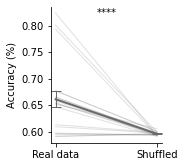

[0.29027778 0.30083333]
 p:
0.5958194732666016


<Figure size 288x216 with 0 Axes>

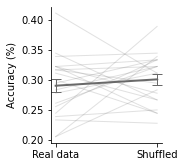

In [9]:
# plot
for i in range(2):
    plt.figure(figsize = (4,3))
    if i == 0:
        acc_list = acc_list_1
    else:
        acc_list = acc_list_2
    num_fly = np.size(acc_list,0)
    the_mean = np.mean(acc_list,0)
    print(the_mean)
    the_std = np.std(acc_list,0)/math.sqrt(num_fly)
    plt.figure(figsize = (2,2.5))
    ax = plt.axes()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for k in range(num_fly):
        plt.plot(acc_list[k,:],c = the_color,linewidth=1,alpha = 0.2)
    plt.errorbar(range(np.size(acc_list,1)),the_mean,yerr=the_std,ecolor=the_color,elinewidth=1,marker='.',mfc=the_color,
    mec=the_color,mew=1,ms=1,alpha=1,capsize=5,capthick=3,color=the_color, linewidth=2)
    plt.xticks([0,1],['Real data','Shuffled'])
    plt.ylabel('Accuracy (%)')

    res = wilcoxon(acc_list[:,0],acc_list[:,1])
    p = res.pvalue
    print(' p:')
    print(p)
    ymax = np.max(acc_list)
    if p<0.05 and p>=0.01:
        plt.text(0.5,ymax,'*',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.01 and p>0.001:
        plt.text(0.5,ymax,'**',verticalalignment = 'center', horizontalalignment = 'center')
    elif p<0.001 and p>=0.0001:
        plt.text(0.5,ymax,'***',verticalalignment = 'center', horizontalalignment = 'center') 
    elif p<0.0001:
        plt.text(0.5,ymax,'****',verticalalignment = 'center', horizontalalignment = 'center') 
    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(the_save_path + '/' + 'acc_'+str(i)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(the_save_path + '/' + 'acc_'+str(i)+'.pdf',dpi = 300,bbox_inches = 'tight')
    plt.show()